# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수, 
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [ ]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [ ]:
sales = pd.read_csv("product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [ ]:
print(sales.shape) 
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [ ]:
#모델 생성
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [ ]:
kmeans.fit(sales)
pred = kmeans.labels_
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2
 2 2 1 2 2 2 1 2 2 2 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [ ]:
sales['cluster'] = pred
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster
0,5.0,0.2,3.0,1.6,0
1,5.0,0.4,3.4,1.6,0
2,5.2,0.2,3.5,1.5,0


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [ ]:
salesDF = sales.drop(columns=['cluster'])
salesDF.head(3)

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [ ]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = pca_transformed[:, 0]
sales['pca_y'] = pca_transformed[:, 1]
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster,pca_x,pca_y
0,5.0,0.2,3.0,1.6,0,-2.516330,-0.074159
1,5.0,0.4,3.4,1.6,0,-2.466679,0.231335
2,5.2,0.2,3.5,1.5,0,-2.557365,0.456400


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

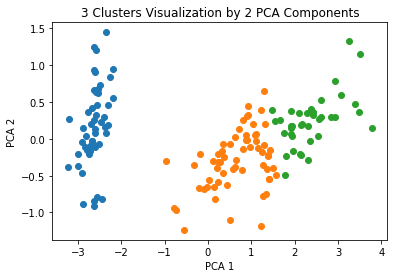

In [ ]:
import matplotlib.pyplot as plt

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = sales[sales['cluster']==0].index
marker1_ind = sales[sales['cluster']==1].index
marker2_ind = sales[sales['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출
plt.scatter(x=sales.loc[marker0_ind,'pca_x'], y=sales.loc[marker0_ind,'pca_y']) 
plt.scatter(x=sales.loc[marker1_ind,'pca_x'], y=sales.loc[marker1_ind,'pca_y'])
plt.scatter(x=sales.loc[marker2_ind,'pca_x'], y=sales.loc[marker2_ind,'pca_y'])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [ ]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [ ]:
#sales의 모든 데이터에 실루엣 계수 구하기
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(sales_data, sales['cluster'])
print(score_samples)

[0.79112928 0.80339312 0.80745367 0.78880536 0.80070215 0.80228142
 0.74329723 0.72294854 0.68429035 0.81317965 0.8150492  0.76597452
 0.81317965 0.76253896 0.81967084 0.81645784 0.65979098 0.77318707
 0.76810436 0.70752222 0.80201832 0.77274376 0.80322804 0.78011482
 0.82756725 0.03010966 0.38588964 0.03550432 0.59090953 0.37118045
 0.59218597 0.36551714 0.25291941 0.34664988 0.57771726 0.35984201
 0.58908336 0.54842372 0.48526634 0.56405686 0.32785615 0.55790518
 0.61041698 0.49945776 0.61027416 0.3294748  0.59038923 0.30806081
 0.47510801 0.50262933 0.38872071 0.1263622  0.11662093 0.55566018
 0.50304225 0.59300633 0.55485078 0.61942931 0.25930188 0.54056538
 0.41885967 0.17026149 0.48518425 0.60814469 0.61300588 0.59447333
 0.50822278 0.62357199 0.27942676 0.62700595 0.6078571  0.6228141
 0.56045218 0.05927744 0.63081388 0.49926839 0.22885652 0.61199229
 0.36134772 0.55800894 0.54386993 0.46567071 0.55930303 0.44180737
 0.56109385 0.2596976  0.23094505 0.5551797  0.28235125 0.02339

In [ ]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff'] = score_samples
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster,silhouette_coeff
0,5.0,0.2,3.0,1.6,0,0.791129
1,5.0,0.4,3.4,1.6,0,0.803393
2,5.2,0.2,3.5,1.5,0,0.807454


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [ ]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(sales_data, sales['cluster'])
print(average_score)

0.538044239952023


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [ ]:
#군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.755123
1    0.416528
2    0.450677
Name: silhouette_coeff, dtype: float64